| [FREQ1](FREQ1_phaseurs.ipynb) <= | FREQ2 : Ondes discrètes | => [VEC3](VEC3_deux_bases.ipynb) | $\|$ | [README](README.ipynb)
|---------------------------|------------------|-----------------------------------|---|---:   

---
# FREQ 2 : Ondes discrètes

- [A](#A---Discr%C3%A9tisation-dans-le-temps) la discrétisation dans le temps $t\leftrightarrow k.T_e \quad \implies \quad f $ de période $F_e$
  * [A1](#A1---Dans-le-plan-complexe) la visualisation de l'onde complexe
  * [A2](#A2---Fr%C3%A9quence-normalis%C3%A9e) la fréquence normalisée 
  * [A3](#A3---Fr%C3%A9quences-n%C3%A9gatives) la symétrie de Hilbert aux fréquences négatives
  * [A4](#A4---P%C3%A9riodicit%C3%A9-selon-les-fr%C3%A9quences) la périodicité $F_e$ des ondes $\vec{w_f}$ selon leur fréquences $f$
  * [A5](#A5---Fr%C3%A9quence-de-Nyquist) le repliement de fréquence autour de la plus haute fréquence en discret : la fréquence de Nyquist
- [B](#B---Discr%C3%A9tisation-fr%C3%A9quentielle) la discrétisation en fréquence $f\leftrightarrow n.F_0 \quad \implies \quad t $ de période $T_0$ 
- [C](#C----Bases-de-fr%C3%A9quences-TFD/FFT) la construction d'une base d'ondes fréquentielle pour la TFD/FFT en matriciel
---

L'objectif est de savoir discrétiser dans le temps et dans les fréquences la base fréquentielle et d'en maîtriser les conséquences.

## A - Discrétisation dans le temps
---

On va représenter le temps continu par un vecteur `t` finement échantillonné.
Prenons l'onde complexe $w_1(t)=e^{i.2\pi.f_1.t} $ de fréquence $f_1$


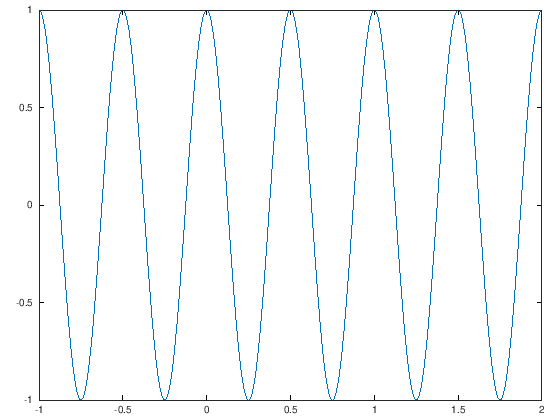

In [1]:
clear all;
t=-1:0.001:2;
f1=2;
w1_de_t=exp(i*2*pi*f1*t);
plot(t,real(w1_de_t))

L'échantillonner revient à la mesurer périodiquement tout les $T_e$ cette fonction.
On va donc effectuer la substitution $t\leftrightarrow k.T_e$.

Pour cela on va être précis sur les types  et séparer :
 - $w_1(t)$ en programmation `w1_de_t` : l'évaluation de $w_1$ à l'instant t qui est un scalaire en math et un vecteur des valeurs de $w_1$ en prog. 
 - $\vec{w_1}$ en programmation `w1` : la fonction de la variable réelle $w_1 : \mathbb{R}\to\mathbb{C}$ qui sera une fonction anonyme (voir le [Tuto. de OCT2](./OCT2_intro.ipynb#Fonctions-anonymes)) en prog.  

L'évaluation d'une fonction discrète aux instants $k.T_e$ est notée :
 - $w_1[k] = w_1(k.T_e)$ où dans ce cas $\vec{w_1}$ est une fonction de la variable discrète $\mathbb{Z} \to \mathbb{C}$  

À vous de définir un vecteur `k` entier permettant d'échantillonner `t` avec une période $T_e$ arbitraire.

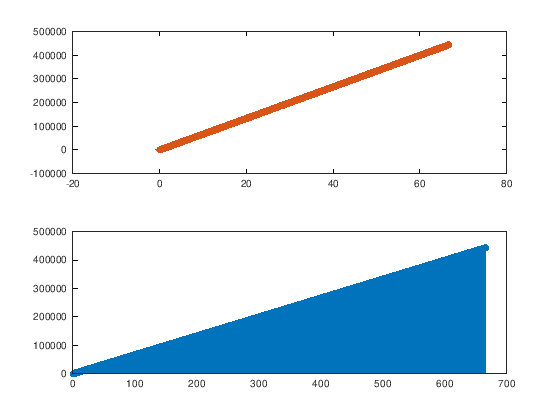

In [2]:
t=-1:0.001:2;
f1=2;
w1 = @(x) exp(i*2*pi*f1*x);     %la fonction w1
w1_de_t= w1(t);                 %les valeurs w1(t)
subplot(211)
plot(t,real(w1_de_t)); hold on;

Te = 0.1;
%VOTRE CODE k=... puis w1_de_k=...
k = 1:666;         %
w1_de_k = 666*k  ;  % utilisez la fonction w1 pas de formules !

plot(k*Te ,real(w1_de_k),'o');
subplot(212);
stem(k,w1_de_k)


### Corrigé

Déroulez la cellule cachée ici.

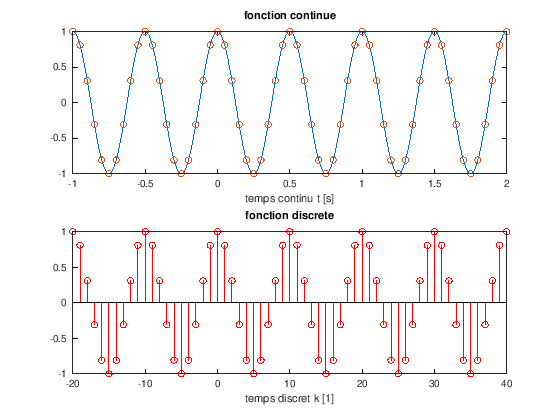

In [3]:
t=-1:0.001:2;
f1=2;
w1 = @(x) exp(i*2*pi*f1*x);     %la fonction w1
w1_de_t= w1(t);                 %les valeurs w1(t)
subplot(211)
plot(t,real(w1_de_t)); hold on;

Te = 0.05;
%CORRIGÉ k=... puis w1_de_k=...
k = -1/Te:2/Te;         %
w1_de_k = w1(k*Te)  ;  % utilisez la fonction w1 pas de formules !

plot(k*Te ,real(w1_de_k),'o');
title("fonction continue");
xlabel("temps continu t [s]")
subplot(212);
stem(k,real(w1_de_k),'r')
xlabel("temps discret k [1]")
title("fonction discrete")

### A1 - Dans le plan complexe

On peut représenter le signal complexe dans le plan complexe et voir que l'onde se balade sur le cercle unité puisque : 
$$ w_{f_1}(t=k T_e)=e^{i2\pi.f_1.\overbrace{k T_e}^{t}} = e^{i2\pi.\frac{f_1}{F_e}.k} = \left(e^{i2\pi.\frac{f_1}{F_e}}\right)^k = q^k$$
Il s'agit d'une suite géométrique de raison $q\in\mathbb{C}$ de module 1. 

Passer à l'instant $k$ suivant, c'est multiplier par $q$ et donc faire une rotation d'angle $\angle{q}=2\pi\frac{f_1}{F_e}$.

Fe =  20
q =  0.80902 + 0.58779i
angle_degres =  36
angle = 36 degrés  = 2pi/10

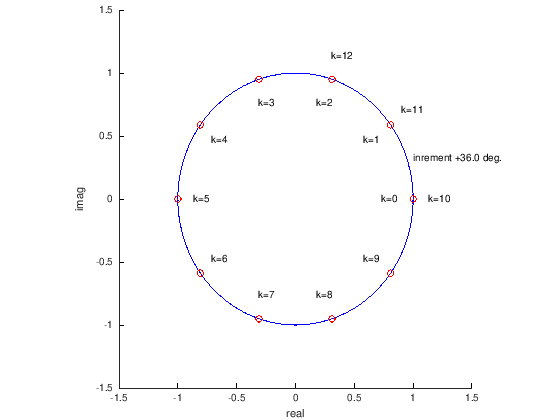

In [4]:
plot(real(w1_de_t),imag(w1_de_t),'b'); hold on
plot(real(w1_de_k),imag(w1_de_k),'ro');
xlabel("real");
ylabel("imag");
axis("square"); grid on;
Fe=1/Te
q=exp(i*2*pi*f1/Fe)
angle_degres = angle(q)*180/pi
printf("angle = %.0f degrés  = 2pi/%.0f", angle(q)*180/pi, 2*pi/angle(q))

% La fonction "increment" place les
% marke k=... intelligemment
addpath("../utiles");
increments(f1/Fe,0:12);
box off;

## A2 - Fréquence normalisée

On remarque que la fonction discrète précédente $k\mapsto\omega_{f1}[k]$ est de période 10, car le rapport $\frac{f_1}{F_e}=\frac{2 Hz}{20 Hz}=\frac{1}{10}$. 

$ w_{f_1}[k]=e^{i2\pi.f_1.\overbrace{k T_e}^{t}} = e^{i2\pi.\frac{f_1}{F_e}.k} = \left(e^{i\frac{2\pi}{10}}\right)^k = q^k$ de période 10 car $\angle{q} = \frac{2\pi}{10}$

Si on échantillonne à $F_e$=48kHz une onde à la fréquence $f_1=4,8$ kHz, on aura le même ratio $\frac{1}{10}$ ; les mêmes échantillons du cercle avec la même pếriode de 10.

Ainsi on définit la fréquence/pulsation normalisée notée $\tilde{f}=\tilde{\omega}$ par le ratio :

$\tilde{f}=\frac{f}{F_e} = \frac{\omega}{\omega_e}=\tilde{\omega}$ est **sans dimension !** 

| $f_1$ [Hz]   | $F_e$ [Hz] | $\tilde{f_1}$ [1] |
|--------------|------------|-------------------|
|  2           |  20        |   0.1             |
| 4.8k         |  48k       |   0.1             |
|  0.1         |  1         |   0.1             |

On définit alors les ondes en fréquence normalisée par :
$ w_{f}[k]=e^{i2\pi.f.\overbrace{k T_e}^{t}} = e^{i2\pi.\frac{f}{F_e}.k} = \left(e^{i2\pi\tilde{f}}\right)^k = q^k$ avec l'incrément d'angle $\Delta=\angle{q} = 2\pi\tilde{f}$

On peut donc toujours considérer que $Fe=1\implies T_e=1 \implies t=k$ en remplaçant les fréquences $f_1$ par leur valeur normalisées $\tilde{f_1}$


f1n =  0.10000
Fen =  1


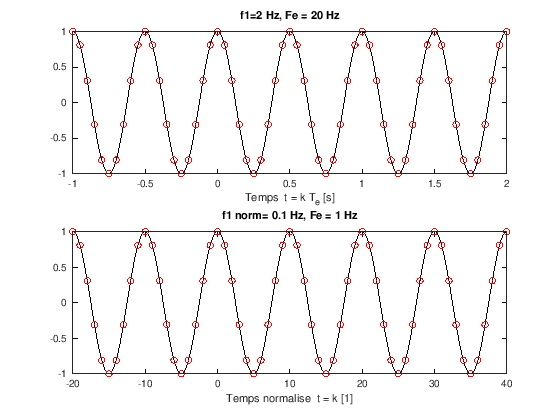

In [5]:
subplot(211);
plot(t,w1(t),'k',k*Te,w1(k*Te),'or');
xlabel("Temps  t = k T_e [s]");
title("f1=2 Hz, Fe = 20 Hz");
subplot(212);

f1n=f1/Fe   % fréquence normalisée
w1n = @(x) exp(i*2*pi*f1/Fe*x);  
Fen = Fe/Fe
tn = t/Te;
plot(tn,w1n(tn),'k',k,w1n(k),'or');
xlabel("Temps normalise  t = k [1]");
title("f1 norm= 0.1 Hz, Fe = 1 Hz");



## A3 - Fréquences négatives

La fréquence négative à du sens en ondes complexes, car on fait tourner l'onde en sens inverse.

En discret on voit que l'on fait des incréments d'angles négatifs :
$ w_{f}[k]=\left(e^{i2\pi\tilde{f}}\right)^k = q^k$  avec l'incrément d'angle  $\Delta=\angle{q} = 2\pi\tilde{f}$

et donc 

$ w_{-f}[k]=\left(e^{-i2\pi\tilde{f}}\right)^k = (\frac{1}{q})^k = q^{-k}$  avec l'incrément d'angle $\Delta=\angle{q^{-1}} = -2\pi\tilde{f}$

On tourne aussi vite, mais dans l'autre sens


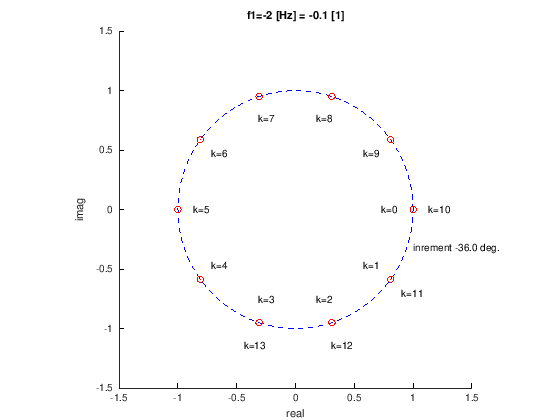

In [6]:
addpath("../utiles");

figure
increments(f=-0.1, k= 0:13);
title("f1=-2 [Hz] = -0.1 [1]");


Remarquez que le signal qui tourne en sens inverse est le conjugué du premier :

> Il y a donc **symétrie de Hilbert** :
> $ \forall k, \quad w_{-f}[k] = \overline{w_f[k]}$  
> Les ondes de fréquences négatives et positives sont conjuquées :
>  - la partie réelle et le module sont pairs
>  - la partie imaginaire et la phase sont impairs

### A4 - Périodicité selon les fréquences

On remarque qu'un incrément d'angle $\Delta=\angle{q} = 2\pi\tilde{f}$ est équivalent à un autre modulo $2\pi$. 
Intéressont nous aux fréquences de l'onde $f_1 = -F_e$ ; $0$ ; $F_e$ ; $2F_e$.  
C'est-à-dire $\tilde{f_1}= -1 ; 0 ; 1 ; 2$  


f =

  -20    0   20   40



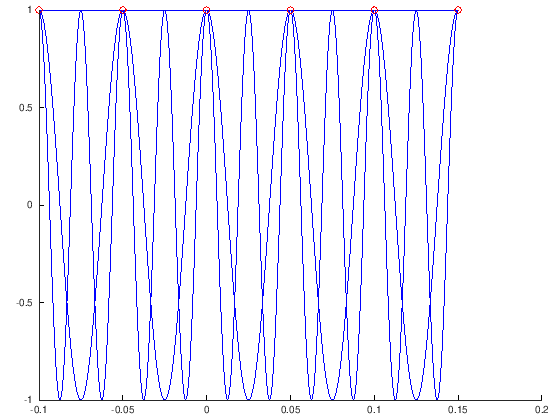

In [7]:
Fe=1/Te;
f= (-1:2)*Fe 

k=-2:3;
t = -2*Te:Te/100:3*Te;

for f1=f
    onde = @(x) exp(i*2*pi*f1*x);
    plot(t,real(onde(t)),'b', k*Te,real(onde(k*Te)),'ro') ; hold on;
    box off;
end


Nous obtenons dans tous les cas le signal discret constant $\vec{w_0}: k \mapsto 1$ car les incréments d'angle $\Delta = \angle{q} = 2\pi\tilde{f} $ sont dans ce cas nul :  
$ -1\times2\pi \equiv 0\times 2\pi \equiv 2\times 2\pi \equiv 0$

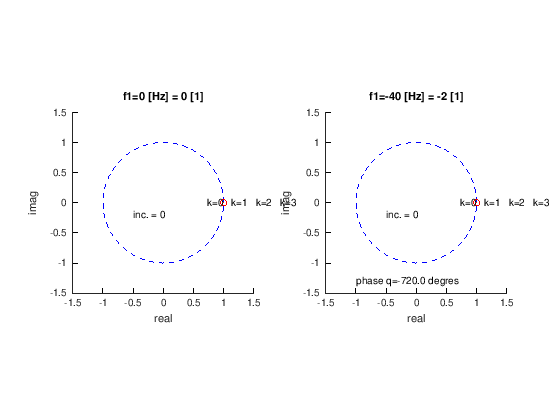

In [8]:
subplot(121);
increments(f = 0, k= 0:3);
title("f1=0 [Hz] = 0 [1]");
subplot(122);
increments(f= -2, k= 0:3);
title("f1=-40 [Hz] = -2 [1]");

Il s'agit du phénomène stroboscopique illustré dans la vidéo ci-dessous : 
 - Notre fréquence d'échantillonnage $F_e$ est celle des éclairs
 - La fréquence de rotation de l'onde exponentielle $f_1$ est celle de rotation du disque

Dans ce cas $f_1= m.F_e$ et la roue fait un nombre exact de $m$ de tours entre deux flashes...

In [9]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/0kgWvQ1DXS8?start=54" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

#### Exercice
On note $\vec{w_f}$ une onde exponentielle discrète de fréquence $f$ définie par $\vec{w_f} : k \mapsto e^{i2\pi.f.k.T_e}$ 

 1) Démontrez **analytiquement** la périodicité des fréquences : 
 $$\forall m \in \mathbb{Z}, \quad  \vec{w_f} = \vec{w_{f+mF_e}} $$
 2) Trouvez le phaseur qui multiplié à $\vec{w_f}$ permet de voir un sinus en partie réelle. On prendra $f_1=1 Hz$ et $F_e=5Hz$
 2) Donnez et affichez au moins trois fréquences équivalentes à la fréquence $f_1=1$ [Hz]. On utilisera un phaseur pour avoir un sinus en partie réelle à la place du cosinus. 
 Indice : c'est le cas où la roue tourne un peu plus vite que les flashes.
 3) De même pour $f_{-1} = -1$ [Hz].  
 Si on visualise la partie réelle de $w_f$ on ne vera pas de différence entre -1 Hz et 1 Hz car $cos(\theta)=cos(-\theta)$. Multipliez cette onde par un phaseur pour "voir le signal tourner à l'envers".   
 Indice : pour trouvez les trois fréquences pensez au cas où la roue tourne un peut plus lentement que les flashes...   

f1 =  1
f =

  -0.66600   0.66600   6.60000



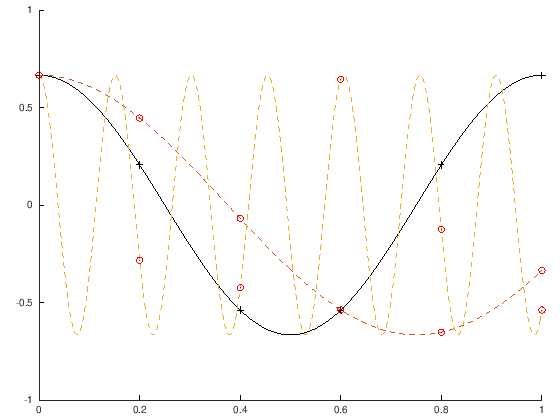

In [10]:
%% VOTRE CODE pour f1= 1Hz
Fe=5;
Te=1/Fe;
k=0:5;
t = 0:Te/100:5*Te;

%% 2 - VOTRE CODE phaseur=... pour afficher un sinus
phaseur = 0.666 ;
f1 = 1
w1 = @(x) exp(i*2*pi*f1*x);
plot(t,real(phaseur*w1(t)),'k', k*Te,real(phaseur*w1(k*Te)),'k+'); hold on;

%% 3 - VOS fréquences équivalentes à 1Hz
f= [ -0.666, 0.666, 6.6]


% Affichage des ondes continues et de l'onde discrète
for freq=f
    wf = @(x) exp(i*2*pi*freq*x);
    plot(t,real(phaseur*wf(t)),'--', k*Te,real(phaseur*wf(k*Te)),'ro') ; hold on;
    box off;
end


f1 = -1
f =

  -0.66600   0.66600   6.60000



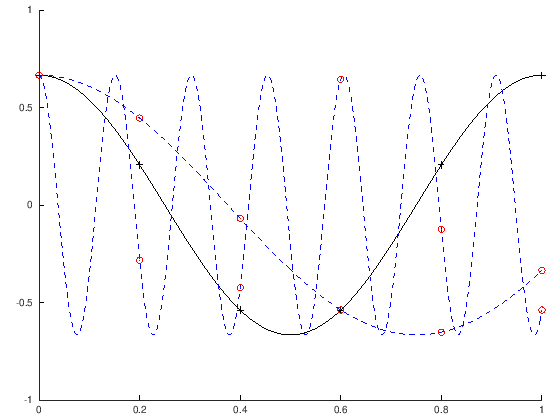

In [11]:
%% VOTRE CODE pour f1= -1Hz
Fe=5;
Te=1/Fe;
k=0:5;
t = 0:Te/100:5*Te;

%% 3 - VOTRE phaseur 
phaseur = 0.666;
f1 = -1
w_moins_1 = @(x) exp(i*2*pi*f1*x);
plot(t,real(phaseur*w_moins_1(t)),'k', k*Te,real(phaseur*w_moins_1(k*Te)),'k+'); hold on;
%% 4- VOS fréquences 
f= [ -0.666, 0.666, 6.6]


for freq=f
    wf = @(x) exp(i*2*pi*freq*x);
    plot(t,real(phaseur*wf(t)),'b--', k*Te,real(phaseur*wf(k*Te)),'ro') ; hold on;
    box off;
end


### Corrigé
Déroulez la cellule cachée

Soit m un entier, montrons que $\forall k, w_f[k]=w_{f+m.F_e}[k]$ :
$$ w_{f+m.F_e}[k] = e^{i2\pi\frac{f+m.F_e}{F_e}k} = e^{i2\pi\left(\frac{f}{F_e}+m\right)k} = e^{i2\pi\frac{f}{F_e}.k+i2\pi.m.k} = e^{i2\pi\frac{f}{F_e}.k}.\underbrace{e^{i.2\pi.m.k}}_{=1} = w_f[k]$$

> une onde de fréquence $f$ donne les mêmes échantillons que toute onde de fréquence $f+m.F_e$

En fréquence normalisée c'est encore plus facile car $F_e$ donne une fréquence normalisée de 1:

Soit m un entier, montrons que $\forall k, w_\tilde{f}[k]=w_{\tilde{f}+m}[k]$ :
$$ w_{\tilde{f}+m}[k] = e^{i2\pi(\tilde{f}+m).k} = e^{i2\pi\tilde{f}.k+i2\pi.m.k} = e^{i2\pi\tilde{f}.k}.\underbrace{e^{i.2\pi.m.k}}_{=1} = w_\tilde{f}[k]$$

> une onde de fréquence normalisée $\tilde{f}$ donne les mêmes échantillons que toute onde de fréquence normalisée $\tilde{f}+m$


Fe =  5
f1 =  1
f =

    6   11   -4

f =  6


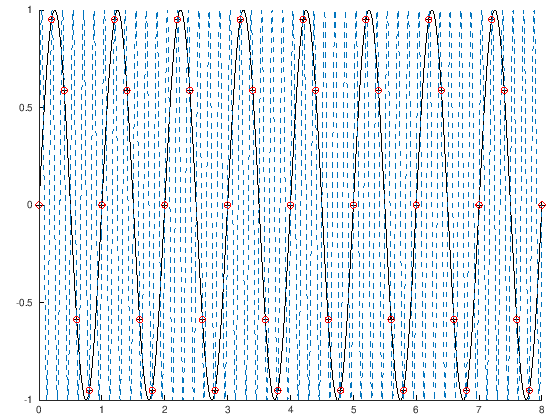

In [12]:
%% CORRIGÉ pour f1= 1Hz
Fe=5
Te=1/Fe;
k=0:40;
t = 0:Te/100:40*Te;

%% CORRIGÉ phaseur=... pour afficher un sinus
phaseur = -i  ; % Le fameux phaseur Q = -i vers le bas. 
f1=1
w1 = @(x) exp(i*2*pi*f1*x);
plot(t,real(phaseur*w1(t)),'k',k*Te,real(phaseur*w1(k*Te)),'k+'); hold on;
,
%% VOS fréquences équivalentes à 1Hz
f= [ Fe+1, 2*Fe+1, -Fe+1]
f= [Fe+1]  %% plus lisible


% Affichage des ondes continues et de l'onde discrète
for freq=f
    wf = @(x) exp(i*2*pi*freq*x);
    plot(t,real(phaseur*wf(t)),'--', k*Te,real(phaseur*wf(k*Te)),'ro') ; hold on;
    box off;
end


Fe =  5
f1 = -1
f =

   4  -6   9



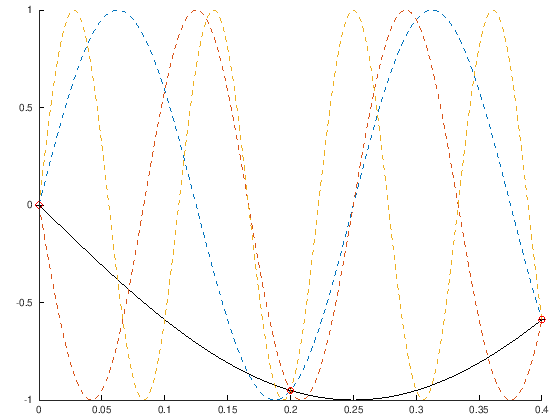

In [13]:
%% CORRIGÉ pour f1= -1Hz
Fe=5       
Te=1/Fe;
% On zoome dans le temps + lisible
k=0:2;
t = 0:Te/100:2*Te;

phaseur = -i;
f1=-1
w_moins_1 = @(x) exp(i*2*pi*f1*x);
plot(t,real(phaseur*w_moins_1(t)),'k',k*Te,real(phaseur*w_moins_1(k*Te)),'k+'); hold on;

%% à vous de compléter 1Hz par les bonnes fréquences
f= [ Fe-1, -Fe-1, 2*Fe-1]


for freq=f
    wf = @(x) exp(i*2*pi*freq*x);
    plot(t,real(phaseur*wf(t)),"--", k*Te,real(phaseur*wf(k*Te)),'ro') ; hold on;
    box off;
end


### A5 - Fréquence de Nyquist

Nous allons mettre en évidence avec les incréments dans le plan complexe que la périodicité implique aussi qu'il y a une fréquence maximale notée $f_q$ qui ne peut être dépassée.

Rappelons que la périodicité implique que $\forall m\in \mathbb{Z}, \quad f\equiv f+m.Fe$, car un incrément angulaire $\Delta \equiv \Delta + 2\pi$ 

Donc inutile de chercher $f_q$ au-delà de $F_e$ elle sera équivalent une fréquence entre $0$ et $F_e$.

Regardons avec les incréments quelques fréquences $f_q$ candidates entre $0$ et $F_e$.

#### Exercice 
Cherchez en tatonnant la fréquence maximale $f_q$ donnant un incrément $\Delta$ le plus grand possible et la période entière la plus courte possible...

Attention ! fq+df a un plus gros incrément que fq
 Augmentez fq...

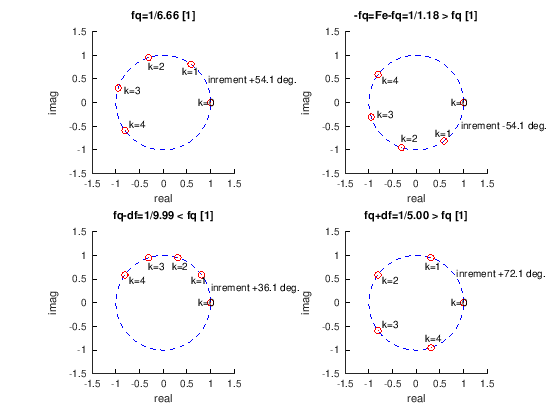

In [16]:
clear all;
addpath("../utiles"); 
%% VOTRE frequence de nyquist ici
fq=1/6.66;
df = 0.05;
subplot(221)
increments(fq,0:4)
title(sprintf("fq=1/%.2f [1]",1/fq));
subplot(222)
increments(1-fq,0:4)
title(sprintf("-fq=Fe-fq=1/%.2f > fq [1]",1/(1-fq)));
subplot(223)
increments(fq-df,0:4)
title(sprintf("fq-df=1/%.2f < fq [1]",1/(fq-df)));
subplot(224)
increments(fq+df,0:4)
title(sprintf("fq+df=1/%.2f > fq [1]",1/(fq+df)));

if (fq > cosh(log((1+i*sqrt(3))/2))+1e-3)
printf("Attention ! fq-df a un plus gros incrément que fq\n Diminuez fq...");
elseif (fq < cosh(log((1+i*sqrt(3))/2))-1e-3)
printf("Attention ! fq+df a un plus gros incrément que fq\n Augmentez fq...");
else
printf("Vous avez trouvé ! le plus gros incrément est 180 degrés... plus modulo 2pi ça fait moins")
end

### Corrigé 

Déroulez la cellule cachée pou r découvrir le signal discret le plus rapide de l'ouest !

Eh oui, la fréquence la plus haute est $\tilde{f_q}=\cosh\left(\ln(\frac{1\pm\sqrt{3}}{2})\right)=\frac{1}{2}$ [1] soit la fréquence de Nyquist :  
$f_q = \frac{F_e}{2}$

La symétrie de Hilbert des fréquences négatives : $ \forall k, \quad w_{-f}[k]  = \overline{w_f[k]}$  
associée à la périodicité fait qu'il y a une symétrie de Hilbert autour de $F_q$ aussi ! :  
$ \forall k, \quad w_{f_q-f}[k] = \overline{w_{f+f_q}[k]}$

En effet : 
$ \forall k, \quad w_{f_q-f}[k] \quad\overset{\text{freq. négatives}}{=}\quad \overline{w_{-f_q+f}[k]}\quad\overset{\text{périodicité}}{=} \quad\overline{w_{F_e-f_q+f}[k]}\quad\overset{{fq=\frac{F_e}{2}}}{=} \quad\overline{w_{f_q+f}[k]}$

On observe bien dans le plan complexe que $f_d-\delta_f$ et $f_q+\delta_f$ sont conjuguée, car tournant en sens opposé.


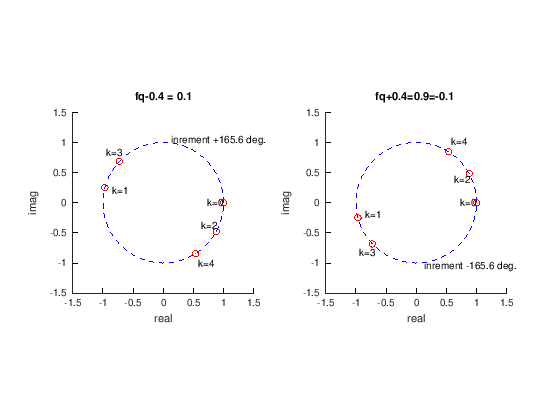

In [18]:
subplot(121)
fq=1/2;
df=0.04;
increments(fq-df,0:4)
title(sprintf("fq-0.4 = 0.1",1/(fq-df)));
subplot(122)
increments(fq+df,0:4)
title(sprintf("fq+0.4=0.9=-0.1 ",1/(fq+df)));


 Si on observe en temporel le signal le plus rapide l'ouest $\vec{w_{f_q}}=\vec{w_{1/2}}$ on comprend... 

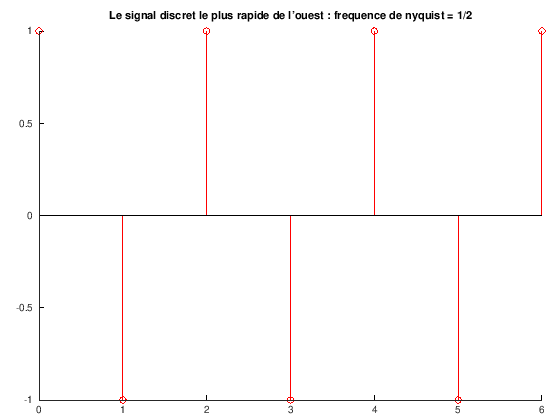

In [16]:
k=0:6;
stem(k,real(exp(i*2*pi/2*k)),'r');
title("Le signal discret le plus rapide de l'ouest : frequence de nyquist = 1/2")

## B - Discrétisation fréquentielle
On a discrétisé le temps et pour le calcul de Transformées de Fourier Discrètes (TFD, avec algo rapide de FFT)  
on va aussi discrétiser les fréquences :


 - $t\leftrightarrow k.T_e \quad\implies\quad \vec{w_f}=\vec{w_{f+m.F_e}}$, périodicité fréquencielle $F_e$  
   Ce qui fera qu'une transformée de Fourier d'un signal discret (TFSD) est $F_e$ périodique.  
  
 - $f\leftrightarrow n. F_0 \quad\implies\quad w_n(t)=w_n(t+T_0)$, périodicité temporelle $T_0$  
   où $F_0$ est la résolution fréquentielle, parfois notée $\Delta_f$.

À chaque n est associé une onde $\vec{w_n}$ associée à la fréquence $n.F_0$ définie par :  
$ \vec{w_n} : k \mapsto e^{i2\pi.\overbrace{n F_0}^{f}. \overbrace{k T_e}^{t}}=e^{i2\pi\frac{F_0}{F_e}.n.k}=q^{n.k}$ avec un incrément $\Delta=\angle{q}=2\pi\tilde{F_0}$

Les $\vec{w_n}$ sont au moins de période $T_0$,  car sa période $\frac{T_0}{n}$ est n fois plus rapide. Donc la discrétisation $F_0$ des fréquences implique une périodicité temporelle $T_0$.  
La notation $T_0$ permet d'évoquer la périodicité des séries de Fourier.

### Choix de $F_0$ arbitraire

Regardons ce que donne l'onde pour une fréquence $F_0$ complètement arbitraire ($F_0=e^1$ par exemple) 

Fe =  10
F0 =  2.7183


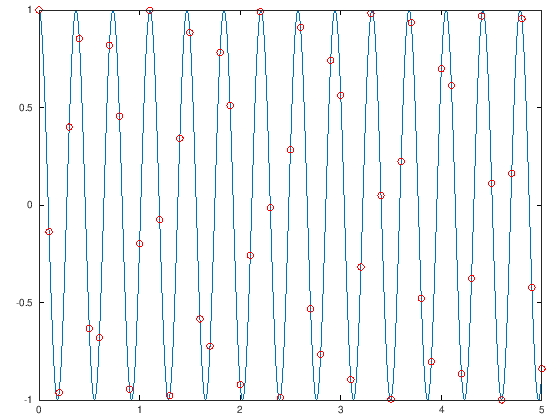

In [17]:
clear all;
addpath("../utiles/");
k = 0:50;
Te=0.1; Fe= 1/Te
t=0:Te/100:50*Te;
F0 = e                  %% Valeur complètement arbitraire
w1 = @(x) exp(i*2*pi*F0*x);
plot(t    , real(w1(t))    ); hold on;
plot(k*Te , real(w1(k*Te)) ,'or' );


 > Les échantillons ne sont jamais les mêmes !
 > Une fonction continue périodique donne une **fonction discrète apériodique** 
 
 En effet, le ratio $\tilde{F_0}=\frac{F_0}{F_e} = \frac{e}{10}$ est irrationnel.  
 À chaque incrément de $k$ l'onde tourne de l'incrément $\Delta=\angle{q}=2\pi\frac{e}{10} = \frac{e\pi}{20}$ complètement irrationnel.  
 Ainsi un incrément $m.\Delta$ ne peut jamais être entier et on ne peut donc jamais trouver une période $m$ pour faire un nombre de tours exact pour retrouver la même valeur : c'est **apériodique !**
 
 $\left\{w_1[k]\right\}_{k\in\mathbb{Z}}$ est une séquence pseudo-aléatoire dite **pseudo-périodique**
 
 Dans l'exercice suivant on cherche la résolution $F_0$ telle que la période soit un nombre de points $N$ voulu.

### Exercice 

 1) Trouvez **analytiquement** la relation entre la résolution fréquentielle $F_0$ et la fréquence d'échantillonnage $F_e$ qui fait que l'onde discrète $\vec{w_1}=w_1[\bullet]$ soit N périodique :
> on veut échantillonner N points par période de $w$ 

 2) Trouvez **à la main** les échantillons de $w_1$ pour N=8 :  soit $w_1[0]=1$ ; $w_1[1]=\dots$ ; $w_1[2]=\dots$ ; jusqu'à  $w_1[8]=1$.
 3) Modifiez ensuite le code précédente pour vérifier ces calculs.
 4) Terminez par un affichage dans le plan complexe des incréments

Fe =  10


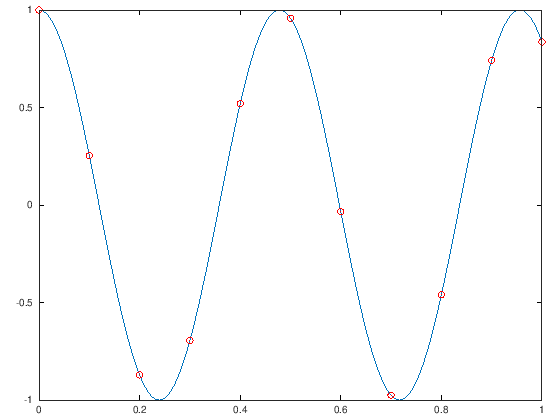

In [18]:
%% code précédent à modifer
%% 1 et 2 à faire sur papier...

clear all;
N=8;
k = 0:10;         %plus d'une période de 8
Te=0.1; Fe= 1/Te
t=0:Te/100:10*Te;

%% 3 - VOTRE CODE F0 = fonction de Fe, N 
F0 = pi*0.666;
w1 = @(x) exp(i*2*pi*F0*x);
plot(t    , real(w1(t))    ); hold on;
plot(k*Te , real(w1(k*Te)) ,'or' );

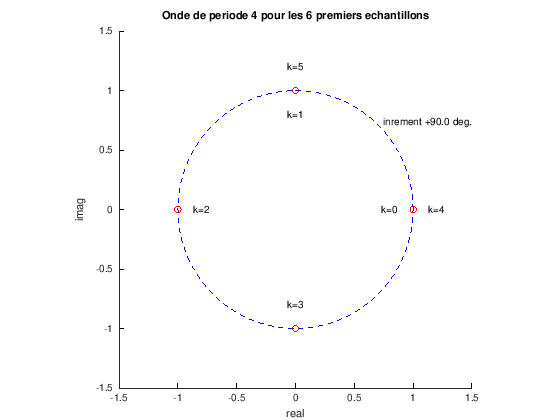

In [19]:
%% 4 - VOTRE affichage dans le plan complexe
% utilisez la fonction increments
addpath("../utiles");
% help increments donne l'exemple suivant
f=1/4 ;
k=0:5 ;
increments(f,k)
title("Onde de periode 4 pour les 6 premiers echantillons")


### Corrigé

Déroulez la cellule cachée ici

On veut $k.\frac{F_0}{F_e}=1$ lorsque $k=N$ donc $F_0=\frac{F_e}{N}$


Fe =  10


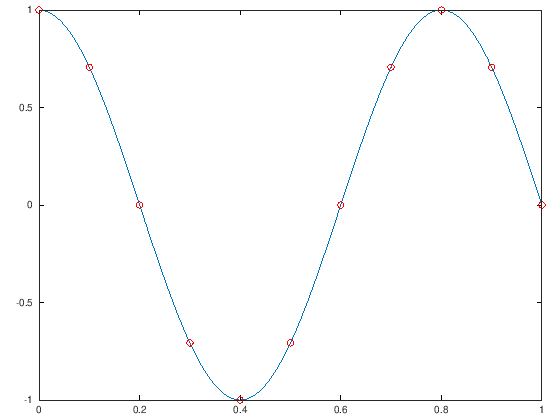

In [20]:
%%CORRIGÉ  
clear all;
N=8;
k = 0:10;         %plus d'une période de 8
Te=0.1; Fe= 1/Te
t=0:Te/100:10*Te;

%% 3 - CORRIGÉ
F0 = Fe/N;   %% notre formule 
w1 = @(x) exp(i*2*pi*F0*x);
plot(t    , real(w1(t))    ); hold on;
plot(k*Te , real(w1(k*Te)) ,'or' );

Dans ce cas $w_1[k]=e^{i2\pi.k.\frac{1}{8}}$ pour avoir une période de 8.

Si on introduit la relation $F_0=\frac{F_e}{N}$ on obtient aussi :
$ \vec{w_1} : k \mapsto e^{i2\pi.\overbrace{F_0}^{f}. \overbrace{k T_e}^{t}}=e^{i2\pi\overbrace{\frac{F_0}{F_e}}^{1/N}.n.k}=e^{i2\pi\frac{n.k}{N}} = q^{n.k}$ avec $q=e^{i\frac{2\pi}{N}}$ et donc un incrément $\Delta=\angle{q}=\frac{2\pi}{N}$

Donc on échantillonne le cercle unité en partant de $1= e^{i.0}$ par incréments $\Delta=\frac{2\pi}{8}$ dans notre cas

$$
\begin{array}{l|cccccccc}
k        & 0 &  1      &  2 &     3  & 4  &   5    & 6  & 7    & 8 & \dots  \\\hline
w_1[k]   & 1 & \frac{1+i}{\sqrt{2}}   & i  &  \frac{-1+i}{\sqrt{2}} & -1 &  \frac{-1-i}{\sqrt{2}} & -i &  \frac{1-i}{\sqrt{2}} & 1 &\dots \\
         & q^0& q^1   & q^2&  q^3   & q^4 & q^5  & q^6 & q^7  & q^8 & \dots
\end{array}
$$

avec $q=e^{i\frac{2\pi}{8}}$ une racine huitème de l'unité, car $q^8=1$ 

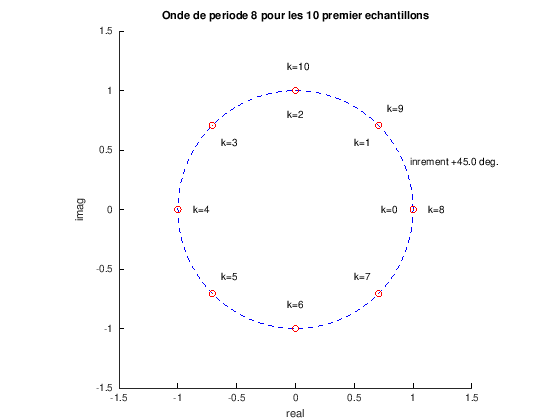

In [21]:
%% 4 - VOTRE affichage dans le plan complexe
% utilisez la fonction increments
addpath("../utiles");
% help increments donne l'exemple suivant
f=1/8 ;
k=0:10 ;
increments(f,k)
title("Onde de periode 8 pour les 10 premier echantillons")


## C -  Bases de fréquences TFD/FFT



Une fois la résolution de fréquence $F_0=\frac{F_e}{N}$ établie pour avoir N échantillons, nous discrétisons aussi le temps :
 - $t\leftrightarrow k.T_e \quad\implies\quad \vec{w_f}=\vec{w_{f+m.F_e}}$, périodicité fréquencielle $F_e$  
   Ce qui fait qu'une transformée de Fourier d'un signal discret (TFSD) donnera les mêmes valeurs pour $f$ et $f+m.F_e$  
  
 - $f\leftrightarrow n. F_0 \quad\implies\quad w_n(t)=w_n(t+T_0)$, périodicité temporelle $T_0$  
   où $F_0$ est la résolution fréquentielle, parfois notée $\Delta_f$.

On aimerait construire une matrice contenant dans chaque rangée les échantillons de l'onde $\vec{w_n}$ : 
$$\vec{w_n} : k\mapsto w[n.k] = e^{i2\pi.\overbrace{nF_0}^{f}.\overbrace{kT_e}^{t}} = e^{i\frac{2\pi}{N}n.k} = q^{n.k}$$

$$
W = \begin{array}{l|cccccr}
    & k=0  & k=1  &  k=2  & k=3  & k=4 & \dots \\\hline
n=0 &w_0[0]&w_0[1]&w_0[2]&w_0[3]&w_0[4]& \dots \\   
n=1 &w_1[0]&w_1[1]&w_1[2]&w_1[3]&w_1[4]& \dots \\   
n=2 &w_2[0]&w_2[1]&w_2[2]&w_2[3]&w_2[4]& \dots \\   
n=3 &w_3[0]&w_3[1]&w_3[2]&w_3[3]&w_3[4]& \dots \\   
\dots&\dots&\dots&w_n[k]=w[n.k]&\dots&\dots&\dots
\end{array}
$$

$W = \left( q^{n.k} \right)_{(n, k)\in\mathbb{Z}^2}$ où $q$ est la racine Nième de l'unité. 

### Exercice 

On simplifie en prenant N=4, calculez la matrice W **à la main** en vous servant du cercle unuité dans le plan complexe.
Arrêtez-vous quand vous aurez vu la périodicité sur $k$ **et** celle sur $n$

Puis calulez W logiciellement : on ne fera pas de boucle ! À vous de :
  1) créer un vecteur k colonne (dimensions 1x8 de 0 à 7), utilisez `size` pour connaitre les dimensions
  1) créer un vecteur n ligne (dimensions 4x1 de 0 à 3)(utilisez l'opérateur ̀`transpose`)
  1) chercher le bon produits `n*k` et `k*n` et créer ainsi la matrice des produits $\left(n.k\right)_{(n,k)}$ avec $n$ en rangées et k en colonnes
  1) ou bien calulez $q$ et par vectorisation de l'opérateur `^` calculez toutes les puissances `nk` pour obtenir W

In [19]:
k = 0:7
size(k)
% 2 - VOTRE n= vertical de 0 à 3
n = 666     ;
% 3 - CHOISISSEZ le bon produit
%  pour avoir une matrice (4 x 8)
%                         (n x k)
nk = n*k
nk = k*n 
% 5 - idem avec q= 
q = 0.666;
W = nk


k =

   0   1   2   3   4   5   6   7

ans =

   1   8

nk =

      0    666   1332   1998   2664   3330   3996   4662

nk =

      0    666   1332   1998   2664   3330   3996   4662

W =

      0    666   1332   1998   2664   3330   3996   4662



### Corrigé

Déroulez la cellule cachée ici

In [20]:
N=4;
k = 0:7               % dim (1x8)
n = transpose(0:3)    % dim (4x1)
nk = n*k;             % dim (4x1).(1x8)=(4x8)
q = exp(i*2*pi/N);    % q=i
W = q .^ nk;            % on vectorise avec . l'opérateur ^
round(W)

k =

   0   1   2   3   4   5   6   7

n =

   0
   1
   2
   3

ans =

   1 + 0i   1 + 0i   1 + 0i   1 + 0i   1 + 0i   1 + 0i   1 + 0i   1 + 0i
   1 + 0i   0 + 1i  -1 + 0i  -0 - 1i   1 - 0i   0 + 1i  -1 + 0i  -0 - 1i
   1 + 0i  -1 + 0i   1 - 0i  -1 + 0i   1 - 0i  -1 + 0i   1 - 0i  -1 + 0i
   1 + 0i  -0 - 1i  -1 + 0i   0 + 1i   1 - 0i  -0 - 1i  -1 + 0i   0 + 1i



On observe bien :
 - la périodicité temporelle de N=4 selon le temps $k$ **mais aussi** 
 - la périodicité fréquencielle de N=4 selon les fréquences $n$ .

On observe bien la **symétrie de Hilbert** par rapport à la fréquence de Nyquist (3ème rangée : n=2 et $\tilde{f}=\frac{n=2}{N=4}=\frac{1}{2}$) : la rangée 2 est la conjuguée de la 4, etc.
